In [27]:
import requests
from urllib import request
import os, glob

no_folder = True
for item in glob.glob("*"):
    if 'data-google' in item:
        no_folder = False
if no_folder == True:
    os.mkdir('data-google')

url = 'https://drive.google.com/drive/folders/1XQU0pluL0m3TIlXqntano12d68peMb8A'
response = requests.get(url)
response.content()
#request.urlretrieve(url, 'data-google/data')


TypeError: 'bytes' object is not callable

In [30]:
from __future__ import print_function

import io

import google.auth
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from googleapiclient.http import MediaIoBaseDownload, 


def download_file(real_file_id):
    """Downloads a file
    Args:
        real_file_id: ID of the file to download
    Returns : IO object with location.

    Load pre-authorized user credentials from the environment.
    TODO(developer) - See https://developers.google.com/identity
    for guides on implementing OAuth2 for the application.
    """
    creds, _ = google.auth.default()

    try:
        # create drive api client
        service = build('drive', 'v3', credentials=creds)

        file_id = real_file_id

        # pylint: disable=maybe-no-member
        request = service.files().get_media(fileId=file_id)
        file = io.BytesIO()
        downloader = MediaIoBaseDownload(file, request)
        done = False
        while done is False:
            status, done = downloader.next_chunk()
            print(F'Download {int(status.progress() * 100)}.')

    except HttpError as error:
        print(F'An error occurred: {error}')
        file = None

    return file.getvalue()


if __name__ == '__main__':
    download_file(real_file_id='1XQU0pluL0m3TIlXqntano12d68peMb8A')

An error occurred: <HttpError 403 when requesting https://www.googleapis.com/drive/v3/files/1XQU0pluL0m3TIlXqntano12d68peMb8A?alt=media returned "Google Drive API has not been used in project 489527673590 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/drive.googleapis.com/overview?project=489527673590 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.". Details: "[{'message': 'Google Drive API has not been used in project 489527673590 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/drive.googleapis.com/overview?project=489527673590 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.', 'domain': 'usageLimits', 'reason': 'accessNotConfigured', 'extendedHelp': 'https://console.developers.google.com'}]">


AttributeError: 'NoneType' object has no attribute 'getvalue'

In [25]:
import gdown

output = '/home/alex/code/alex-mazheika/autism/notebooks/data-google/20150428_collected_images.tgz'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/drive/folders/1XQU0pluL0m3TIlXqntano12d68peMb8A
To: /home/alex/code/alex-mazheika/autism/notebooks/data-google/20150428_collected_images.tgz
350kB [00:00, 999MB/s]


'/home/alex/code/alex-mazheika/autism/notebooks/data-google/20150428_collected_images.tgz'

2023-06-15 12:27:24.947824: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-15 12:27:24.967798: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 12:27:25.068599: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 12:27:25.069533: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 12:27:25.722913: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Number of entries: 2938
Class Distribution:
autistic        1469
non_autistic    1469
Name: labels, dtype: int64


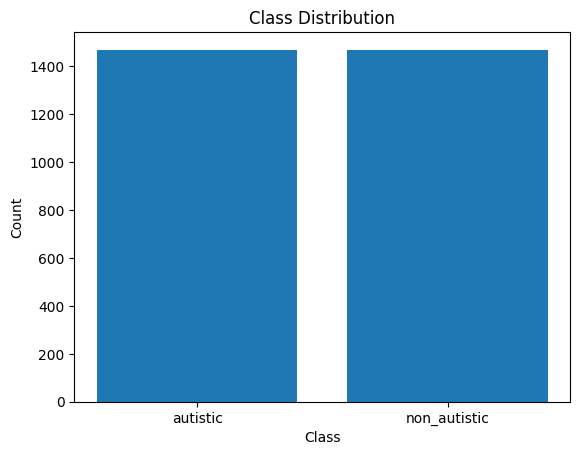

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import cv2
import os, glob
import numpy as np

# Load the dataset into a pandas DataFrame
dataset = pd.read_csv('/home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/autism.csv')

# Replace 'labels' with the correct column name representing the class labels
labels = dataset['labels']

# Calculate the frequency of each class
class_counts = labels.value_counts()

# Count the number of entries in the dataset
num_entries = len(dataset)

# Display the number of entries and class distribution
print(f"Number of entries: {num_entries}")
print("Class Distribution:")
print(class_counts)

# Visualize the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## Resize the data

In [2]:
SCALER = 1.1 #increase of the output image by this factor wrt recognized face

def resize_folder(input_f, output_f):
    '''resize the images in input_f keeping the ratio height / width
    to be constant according to a picture with lowest area of face in the same folder; 
    the new images are centered on face
    Return: a tuple (height / width)'''
    mtcnn = MTCNN()
    area = 10000000000
    for im in glob.glob(input_f+'/*'):
        image = cv2.imread(im)
        try:
            data = mtcnn.detect_faces(image)
            box = data[0]['box']
            if box[3] * box[2] < area:
                area = box[3] * box[2]
                height, width = box[3], box[2]
        except:
            pass
    ratio = float(height)/float(width)
    for im in glob.glob(input_f+'/*'):
        image = cv2.imread(im)
        try:
            data = mtcnn.detect_faces(image)
            box = data[0]['box']
            #bimg = image[box[1]: box[1]+int(box[3]*SCALER), box[0]: box[0]+int(box[3]*SCALER/ratio)]
            bimg = image[box[1]: box[1]+int(box[2]* SCALER * ratio), box[0]: box[0]+int(box[2]*SCALER)]
            bimg_res = cv2.resize(bimg, (width,height))
            if os.path.exists(output_f) == False:
                os.mkdir(output_f)
            file_name = im.split(input_f)[-1][1:]
            cv2.imwrite(os.path.join(output_f, file_name), bimg_res)
        except:
            print(f"No faces were recognized in image {im.split(input_f)[-1][1:]}")
            
    return (height, width)

In [2]:
SCALER = 1.1 #increase of the output image by this factor wrt recognized face

def resize(im, height, width):
    '''resize the image according to specified height and width
    so that a new image is centered on face
    Return: an np.array or None'''
    mtcnn = MTCNN()
    image = cv2.imread(im)
    ratio = height / width
    try:
        data = mtcnn.detect_faces(image)
        box = data[0]['box']
        bimg = image[box[1]: box[1]+int(box[2]* SCALER * ratio), box[0]: box[0]+int(box[2]*SCALER)]
        bimg_res = cv2.resize(bimg, (width,height))
        return bimg_res
    except:
        print(f"No faces were recognized in image {im}")
        return None
    
def resize_squared(im, height, width, shift=0, SCALER=1.0):
    '''resize the image according to specified height and width
    so that a new image is centered on face
    shift - the number of pixels for which the origin is shifted up and left
    SCALER - scaling factor
    Return: an np.array or None'''
    mtcnn = MTCNN()
    image = cv2.imread(im)
    ratio = height / width
    try:
        data = mtcnn.detect_faces(image)
        box = data[0]['box']
        bimg = image[box[1]-shift: box[1]-shift+int(box[3]* SCALER), box[0]-shift: box[0]-shift+int(box[3]*SCALER)]
        bimg_res = cv2.resize(bimg, (width,height))
        return bimg_res
    except:
        print(f"No faces were recognized in image {im}")
        return None

original image: (324, 317, 3)
1/1 [==============================] - 0s 62ms/step
[26, 36, 264, 314]
(244, 244, 3)


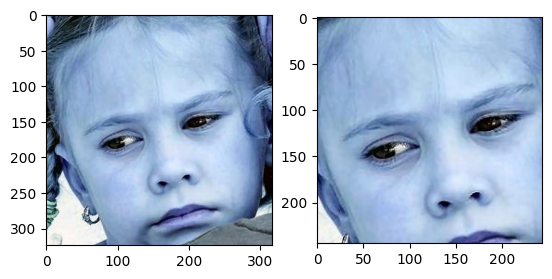

In [86]:
mtcnn = MTCNN()
im = '/home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0323.jpg'
image = cv2.imread(im)
print(f'original image: {image.shape}')
data = mtcnn.detect_faces(image)
box = data[0]['box']
print(box)
bimg = image[box[1]-0: box[1]-0+244, box[0]-0: box[0]-0+244]
print(bimg.shape)

plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(bimg)

In [2]:
HOME = '/home/alex/'
data_folder = 'code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/'

train_inp_aut = os.path.join(HOME, data_folder,'train/autistic/')
train_inp_non = os.path.join(HOME, data_folder,'train/non_autistic/')
val_inp_aut = os.path.join(HOME, data_folder,'valid/autistic/')
val_inp_non = os.path.join(HOME, data_folder,'valid/non_autistic/')
test_inp_aut = os.path.join(HOME, data_folder,'test/autistic/')
test_inp_non = os.path.join(HOME, data_folder,'test/non_autistic/')

train_out_aut = os.path.join(HOME, data_folder,'train_res_aut/')
train_out_non = os.path.join(HOME, data_folder,'train_res_non/')
val_out_aut = os.path.join(HOME, data_folder,'valid_res_aut/')
val_out_non = os.path.join(HOME, data_folder,'valid_res_non/')
test_out_aut = os.path.join(HOME, data_folder,'test_res_aut/')
test_out_non = os.path.join(HOME, data_folder,'test_res_non/')

!!!Run cells below only if no resized images are stored!!!

In [91]:
height, width = resize_folder(test_inp_non, test_out_non)

In [92]:
inp_f = [train_inp_aut, train_inp_non, val_inp_aut, val_inp_non, test_inp_aut]
out_f = [train_out_aut, train_out_non, val_out_aut, val_out_non, test_out_aut]

for i,f in enumerate(inp_f):
    for im in glob.glob(inp_f[i]+'/*'):
        out_im = resize(im, height, width)
        if type(out_im) == np.ndarray:
            if os.path.exists(out_f[i]) == False:
                    os.mkdir(out_f[i])
            file_name = im.split(inp_f[i])[-1][1:]
            cv2.imwrite(os.path.join(out_f[i], file_name), out_im)

1/1 [==============================] - 0s 64ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0343.jpg
1/1 [==============================] - 0s 59ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0191.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 94ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0412.jpg
1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1134.jpg
1/1 [==============================] - 0s 105ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0728.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0383.jpg
1/1 [==============================] - 0s 90ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1258.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0898.jpg
1/1 [==============================] - 0s 93ms/step


KeyboardInterrupt: 

resize images to 224

In [3]:
train_224_aut = os.path.join(HOME, data_folder,'train_224_aut/')
train_224_non = os.path.join(HOME, data_folder,'train_224_non/')
val_224_aut = os.path.join(HOME, data_folder,'valid_224_aut/')
val_224_non = os.path.join(HOME, data_folder,'valid_224_non/')
test_224_aut = os.path.join(HOME, data_folder,'test_224_aut/')
test_224_non = os.path.join(HOME, data_folder,'test_224_non/')

inp_f = [train_inp_aut, train_inp_non, val_inp_aut, val_inp_non, test_inp_aut, test_inp_non]
out_f = [train_224_aut, train_224_non, val_224_aut, val_224_non, test_224_aut, test_224_non]


!!!Run cells below only if no resized images are stored!!!

In [5]:
for fold in out_f:
    if os.path.exists(fold) == False:
        os.mkdir(fold)

for i,f in enumerate(inp_f):
    for im in glob.glob(inp_f[i]+'/*'):
        out_im = resize_squared(im, 224, 224)
        if type(out_im) == np.ndarray:
            if os.path.exists(out_f[i]) == False:
                    os.mkdir(out_f[i])
            file_name = im.split(inp_f[i])[-1]#[1:]
            cv2.imwrite(os.path.join(out_f[i], file_name), out_im)


1/1 [==============================] - 0s 62ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0343.jpg
1/1 [==============================] - 0s 56ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0191.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0412.jpg
1/1 [==============================] - 0s 63ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1134.jpg
1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0728.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0383.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1258.jpg
1/1 [==============================] - 0s 64ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0898.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0921.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0110.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0830.jpg
1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1004.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0949.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0023.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0985.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0486.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0088.jpg
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0602.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0270.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0696.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0218.jpg
1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1152.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0344.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0605.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0548.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0447.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0063.jpg
1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1131.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0371.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0393.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0666.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0277.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1076.jpg


1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0408.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0709.jpg
3/3 [==============================] - 0s 4ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0306.jpg
1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1235.jpg
1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0720.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0015.jpg
2/2 [==============================] - 0s 3ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0239.jpg
1/1 [==============================] - 0s 94ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0483.jpg
1/1 [==============================] - 0s 17ms/step


2/2 [==============================] - 0s 3ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1255.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0032.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0665.jpg
1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1132.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1205.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0441.jpg
1/1 [==============================] - 0s 64ms/step


2/2 [==============================] - 0s 5ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0753.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0655.jpg
1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 101ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0541.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0920.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0091.jpg
1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0695.jpg
1/1 [==============================] - 0s 17ms/step


2/2 [==============================] - 0s 5ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0846.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0354.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0421.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0556.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0019.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0700.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0068.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in 

1/1 [==============================] - 0s 65ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0915.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0516.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1142.jpg
1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0891.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0256.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0151.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0120.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0702.jpg
1/1 [==============================] - 0s 91ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0350.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0216.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0823.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0236.jpg
2/2 [==============================] - 0s 6ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0159.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1047.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0084.jpg
1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0072.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0030.jpg


1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1075.jpg
1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0673.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0059.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0607.jpg
1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0293.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0914.jpg
1/1 [==============================] - 0s 96ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0056.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0604.jpg
1/1 [==============================] - 0s 105ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0356.jpg
1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1218.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0879.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0406.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0716.jpg
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 94ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0943.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1139.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0854.jpg
1/1 [==============================] - 0s 92ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0240.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0962.jpg
1/1 [==============================] - 0s 89ms/step
No faces were recognized in 

1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0640.jpg
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1213.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0403.jpg
1/1 [==============================] - 0s 16ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0274.jpg
1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0978.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0560.jpg
1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0278.jpg
1/1 [==============================] - 0s 93ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0386.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0198.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in 

1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1167.jpg
2/2 [==============================] - 0s 8ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0225.jpg
1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0046.jpg
1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0660.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0719.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in i

1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1206.jpg
1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1183.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1022.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 106ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0391.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0086.jpg
1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0211.jpg
1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0413.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0499.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1094.jpg
1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0005.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0269.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0076.jpg
1/1 [==============================] - 0s 104ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0298.jpg
1/1 [==============================] - 0s 16ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0388.jpg
1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0048.jpg
1/1 [==============================] - 0s 108ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1191.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0215.jpg
1/1 [==============================] - 0s 93ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0877.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0021.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1144.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0399.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0807.jpg
1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0175.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0622.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in 

1/1 [==============================] - 0s 100ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1037.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0473.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1119.jpg
1/1 [==============================] - 0s 104ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0566.jpg
1/1 [==============================] - 0s 90ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0201.jpg
1/1 [==============================] - 0s 21ms/step


2/2 [==============================] - 0s 4ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0963.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0090.jpg
2/2 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 18ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0922.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0410.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0703.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 91ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0044.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1062.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1149.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 101ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1208.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0493.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0996.jpg
1/1 [==============================] - 0s 107ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0001.jpg
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1227.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1153.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1187.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1122.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0220.jpg
1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 95ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0187.jpg
1/1 [==============================] - 0s 92ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0550.jpg
1/1 [==============================] - 0s 91ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0737.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1064.jpg
1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0074.jpg
1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1247.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1054.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1151.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0989.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0988.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1225.jpg
1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0344.jpg
1/1 [==============================] - 0s 104ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0329.jpg
1/1 [==============================] - 0s 99ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0437.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0447.jpg
1/1 [==============================] - 0s 90ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1068.jpg
1/1 [==============================] - 0s 73ms/step
No face

1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1228.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0055.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0093.jpg
1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0307.jpg
1/1 [==============================] - 0s 94ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0935.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0398.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1204.jpg
1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 105ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1033.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1169.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0069.jpg
1/1 [==============================] - 0s 94ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1081.jpg
1/1 [==============================] - 0s 95ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0895.jpg
1/1 [==============================] - 0s 79ms/step
No face

1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0239.jpg
1/1 [==============================] - 0s 17ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0764.jpg
1/1 [==============================] - 0s 93ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0244.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0268.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0137.jpg
1/1 [==============================] - 0s 75ms/step
No faces

1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1249.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1091.jpg
1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0263.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1155.jpg
1/1 [==============================] - 0s 97ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1051.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1241.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0107.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0939.jpg
1/1 [==============================] - 0s 90ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0480.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0912.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0931.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 91ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0427.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0501.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0392.jpg
1/1 [==============================] - 0s 90ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0260.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1165.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0928.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1095.jpg
2/2 [==============================] - 0s 6ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0124.jpg
1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1110.jpg
1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1220.jpg
1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1102.jpg
1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0188.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1193.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0993.jpg
1/1 [==============================] - 0s 95ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0676.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0120.jpg
3/3 [==============================] - 0s 8ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0209.jpg
1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 104ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0417.jpg
1/1 [==============================] - 0s 102ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0892.jpg
1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0321.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0159.jpg
1/1 [==============================] - 0s 100ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1236.jpg


1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0057.jpg
1/1 [==============================] - 0s 98ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0184.jpg
1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0535.jpg
1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 123ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0008.jpg
1/1 [==============================] - 0s 93ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1058.jpg
1/1 [==============================] - 0s 112ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0084.jpg
1/1 [==============================] - 0s 93ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0099.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 119ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1009.jpg
1/1 [==============================] - 0s 107ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1082.jpg
1/1 [==============================] - 0s 90ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0446.jpg
1/1 [==============================] - 0s 96ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1158.jpg
1/1 [==============================] - 0s 111ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0097.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 137ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1075.jpg
1/1 [==============================] - 0s 106ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0472.jpg
1/1 [==============================] - 0s 103ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0372.jpg
1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0238.jpg
1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1019.jpg
1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1083.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0181.jpg
1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0192.jpg
1/1 [==============================] - 0s 337ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0056.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0689.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1218.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0406.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0438.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1111.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1129.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0066.jpg
1/1 [==============================] - 0s 22ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1139.jpg
2/2 [==============================] - 0s 4ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0553.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1173.jpg
1/1 [==============================] - 0s 84ms/step
No faces 

1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0917.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0462.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0289.jpg
1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0902.jpg


1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0331.jpg
4/4 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0897.jpg
1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1171.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0818.jpg
2/2 [==============================] - 0s 5ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0169.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0116.jpg
1/1 [==============================] - 0s 93ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0808.jpg
1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0171.jpg
1/1 [==============================] - 0s 99ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0888.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1012.jpg
1/1 [==============================] - 0s 76ms/step
No faces

1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0889.jpg
1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0829.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1022.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1248.jpg
1/1 [==============================] - 0s 26ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1120.jpg
1/1 [==============================] - 0s 95ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0391.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 100ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0578.jpg


1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0365.jpg
1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1124.jpg
1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1133.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0111.jpg
1/1 [==============================] - 0s 124ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1174.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0422.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0076.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0910.jpg
1/1 [==============================] - 0s 94ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0913.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0477.jpg
1/1 [==============================] - 0s 111ms/step
No face

1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1005.jpg
1/1 [==============================] - 0s 110ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0226.jpg
1/1 [==============================] - 0s 130ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0245.jpg
2/2 [==============================] - 0s 4ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0871.jpg
1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 108ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0232.jpg
1/1 [==============================] - 0s 94ms/step


2/2 [==============================] - 0s 6ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0389.jpg
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 89ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0419.jpg
1/1 [==============================] - 0s 91ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0208.jpg
1/1 [==============================] - 0s 109ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1037.jpg
1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0138.jpg
1/1 [==============================] - 0s 97ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1201.jpg
1/1 [==============================] - 0s 97ms/step
No face

1/1 [==============================] - 0s 112ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0233.jpg
1/1 [==============================] - 0s 93ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0952.jpg
1/1 [==============================] - 0s 21ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0924.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0368.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1061.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0977.jpg
1/1 [==============================] - 0s 20ms/step


2/2 [==============================] - 0s 6ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0410.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 138ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0182.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/087.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/058.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/008.jpg
1/1 [==============================] - 0s 106ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/037.jpg
1/1 [==============================] - 0s 100ms/step
No faces were recognized 

1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/099.jpg
1/1 [==============================] - 0s 94ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/023.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/053.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 113ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/043.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/097.jpg
1/1 [==============================] - 0s 97ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/048.jpg
1/1 [==============================] - 0s 140ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/038.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/016.jpg
1/1 [==============================] - 0s 23ms/step
No faces were recognized in ima

1/1 [==============================] - 0s 101ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/020.jpg
1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/040.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/049.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/060.jpg
1/1 [==============================] - 0s 112ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/047.jpg
1/1 [==============================] - 0s 107ms/step
No faces were recognized in im

1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/044.jpg
1/1 [==============================] - 0s 92ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/087.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 108ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/067.jpg
2/2 [==============================] - 0s 7ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/016.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/033.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 119ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/047.jpg
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 102ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/005.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/068.jpg
1/1 [==============================] - 0s 92ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/056.jpg
1/1 [==============================] - 0s 108ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/006.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/001.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/010.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/003.jpg
1/1 [==============================] - 0s 91ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/067.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/096.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/032.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/021.jpg
1/1 [==============================] - 0s 100ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/018.jpg
1/1 [==============================] - 0s 105ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/017.jpg
1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 110ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/066.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/031.jpg
1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/non_autistic/044.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/non_autistic/050.jpg
1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/non_autistic/053.jpg
1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 100ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/non_autistic/097.jpg
1/1 [==============================] - 0s 98ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/non_autistic/090.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/non_autistic/032.jpg
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/non_autistic/034.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/non_autistic/055.jpg
1/1 [==============================] - 0s 91ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/non_autistic/031.jpg
1/1 [==============================] - 0s 88ms/step


### Optional: duplicate images via mirroring

In [5]:
def mirror_image(image):
    im_mirr = image[:, ::-1, :]
    return im_mirr

def mirror_in_folder(fold, extention):
    '''fold: str - name of directory where the files are stored and new files will be placed
    extention: str - suffix in the name of new files'''
    for im in glob.glob(fold+'/*'):
        image = cv2.imread(im)
        new_image = mirror_image(image)
        new_name = im.split('/')
        new_name[-1] = new_name[-1].split('.')[0] + extention + '.' + new_name[-1].split('.')[1]
        s = ""
        for it in new_name:
            s += it+"/"
        new_name = s[:-1]
        cv2.imwrite(new_name, new_image)
        

In [42]:
mirror_in_folder(train_out_aut,'mirr')
mirror_in_folder(train_out_non,'mirr')


## CNN part

load the data:

In [4]:
def load_the_data(folder_one, folder_zero):
    X, y = [],[]

    for im in glob.glob(folder_one+'/*'):
        image = cv2.imread(im)
        X.append(image)
        y.append(1)

    for im in glob.glob(folder_zero+'/*'):
        image = cv2.imread(im)
        X.append(image)
        y.append(0)

    return (np.array(X), np.array(y))


In [14]:
#X, y = load_the_data(train_out_aut, train_out_non)
#X_val, y_val = load_the_data(val_out_aut, val_out_non)
#X_test, y_test = load_the_data(test_out_aut, test_out_non)

X, y = load_the_data(train_224_aut, train_224_non)
X_val, y_val = load_the_data(val_224_aut, val_224_non)
X_test, y_test = load_the_data(test_224_aut, test_224_non)

scale the data

In [6]:
def scaled_data(data):
    return data/255

In [ ]:
X_sc = scaled_data(X)
X_val_sc = scaled_data(X_val)
X_test_sc = scaled_data(X_test)

In [2]:
del X
del X_val
del X_test

NameError: name 'X' is not defined

prepare for the model initialization:

In [8]:
from tensorflow.keras import layers, models, Sequential

def model_init2D(shape):
    '''initialize the model with given shape of pictures'''
    
    model = Sequential()
    model.add(layers.Conv2D(16, kernel_size=(6,6), activation='relu', padding='same', input_shape=shape))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(32, kernel_size=(4,4), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.1))
    
    #model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    #model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.Dropout(0.1))
    
    model.add(layers.Conv2D(64, kernel_size=(2,2), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.1))
    
    model.add(layers.Flatten())
    #model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall','accuracy'])
    
    return model


In [9]:
def model_VGG16(shape):
    '''initialize the model with given shape of pictures'''
    
    model = Sequential()
    model.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=shape))
    model.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall','accuracy'])
    
    return model

def model_vgg16(shape):
    from tensorflow.keras.applications.vgg16 import VGG16
    model = VGG16(include_top=True,
                weights=None, #'imagenet',
                input_tensor=None,
                #input_shape=shape,
                pooling=None,
                classes=1,
                classifier_activation='sigmoid')
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall','accuracy'])
    
    return model

In [121]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3

def model_EffNet(shape):
    model = EfficientNetB3(include_top=False, weights="imagenet", input_shape=shape, pooling='max')
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

def fit_model(X, y, model, batch_size=32, epochs=100):
    '''fits the model and returns history'''
    
    es = EarlyStopping(patience=5, restore_best_weights=True)
    history = model.fit(X, y, batch_size=32, epochs=epochs, callbacks=[es], validation_data=(X_val_sc, y_val))
    
    return history

initialize the model:

In [11]:
shape = X_sc[0].shape
#model = model_init2D(shape)
model = model_vgg16(shape)
#model = model_VGG16(shape)
#model = model_EffNet(shape)

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Baseline:

In [50]:
1-y.sum()/len(y)

0.5043668122270742

fit the model:

In [15]:
print(X_sc.shape)
print(y.shape)

(2200, 224, 224, 3)
(2200,)


In [12]:
history = fit_model(X_sc, y, model, 32, 150)

Epoch 1/150
69/69 [==============================] - 1633s 24s/step - loss: 0.6979 - recall: 0.5054 - accuracy: 0.4982 - val_loss: 0.6978 - val_recall: 1.0000 - val_accuracy: 0.4535
Epoch 2/150
69/69 [==============================] - 1495s 22s/step - loss: 0.6936 - recall: 0.5362 - accuracy: 0.4873 - val_loss: 0.6935 - val_recall: 1.0000 - val_accuracy: 0.4535
Epoch 3/150
69/69 [==============================] - 1494s 22s/step - loss: 0.6932 - recall: 1.0000 - accuracy: 0.5027 - val_loss: 0.6938 - val_recall: 1.0000 - val_accuracy: 0.4535
Epoch 4/150
69/69 [==============================] - 1521s 22s/step - loss: 0.6932 - recall: 1.0000 - accuracy: 0.5027 - val_loss: 0.6937 - val_recall: 1.0000 - val_accuracy: 0.4535
Epoch 5/150
48/69 [===================>..........] - ETA: 8:15 - loss: 0.6931 - recall: 1.0000 - accuracy: 0.5078

KeyboardInterrupt: 

In [13]:
print(f"Loss: {np.mean(history.history['loss'])}")
print(f"Accuracy: {np.mean(history.history['accuracy'])}")
print(f"Recall: {np.mean(history.history['recall'])}")
print(f"Validation loss: {np.mean(history.history['val_loss'])}")
print(f"Validation accuracy: {np.mean(history.history['val_accuracy'])}")
print(f"Validation recall: {np.mean(history.history['val_recall'])}")

NameError: name 'history' is not defined

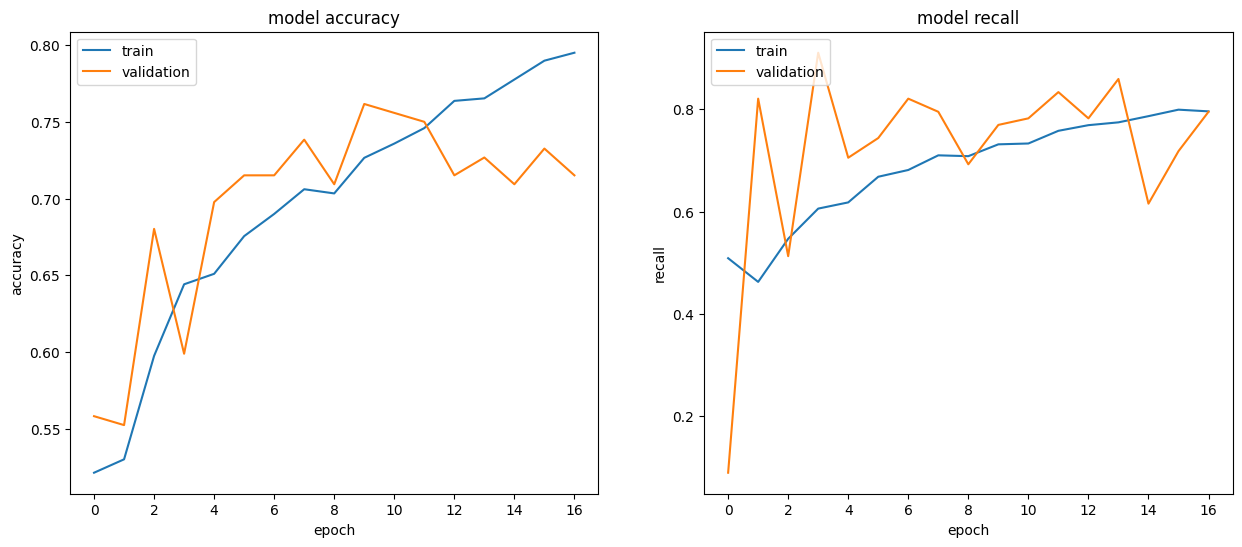

In [53]:
def plot_hist(hist):
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    
    plt.subplot(122)
    plt.plot(hist.history["recall"])
    plt.plot(hist.history["val_recall"])
    plt.title("model recall")
    plt.ylabel("recall")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    
    plt.show()

plot_hist(history);

test predictions:

In [198]:
#y_pred = model.predict(X_test_sc)
#y_pred_1 = []
#for item in y_pred:
#    y_pred_1.append(round(np.mean(item)))
#print(f'Prediction accuracy is {1 - sum(abs(y_pred_1 - y_test))/len(y_test)}')

In [54]:
test = model.evaluate(X_test_sc, y_test)
print(f"Test accuracy is {round(test[-1], 2)} and recall - {round(test[1], 2)}")

6/6 [==============================] - 0s 6ms/step - loss: 0.4496 - recall: 0.7059 - accuracy: 0.7614
Test accuracy is 0.76 and recall - 0.71


## Save the model

In [136]:
model.save(os.path.join(HOME, data_folder,'my_model'))

2023-06-13 17:39:47.508997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32,29,16]
	 [[{{node inputs}}]]
2023-06-13 17:39:47.517555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,14,13,32]
	 [[{{node inputs}}]]
2023-06-13 17:39:47.525923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,6,6,64]
	 [[{{node inputs}}]]
202

INFO:tensorflow:Assets written to: /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/my_model/assets


INFO:tensorflow:Assets written to: /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/my_model/assets
